In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# lecture du dataset sur Pandas
dataset = pd.read_csv("./Exercices/50_Startups/50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [47]:
dataset.shape

(50, 5)

In [48]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


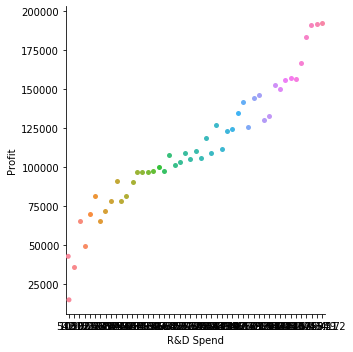

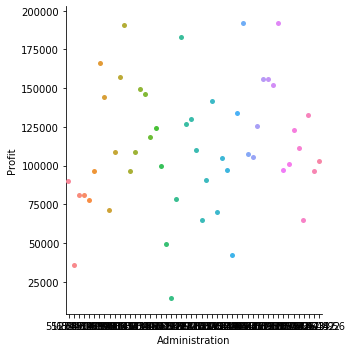

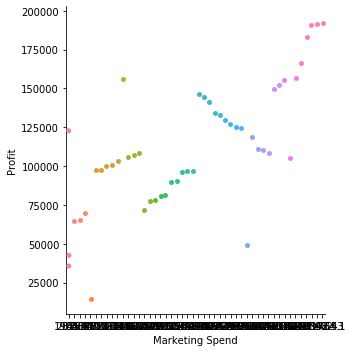

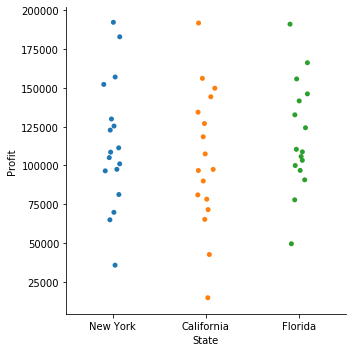

In [50]:
# Prévisualisation des données 
### Linear Model
import seaborn as sns

target = 'Profit'

for column in [x for x in dataset.columns if x != target]:
    sns.catplot(x=column, y="Profit", data=dataset)

In [51]:
# Gestion des valeurs manquantes 
### Voir s'il y a des valeurs manquantes 
dataset.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [75]:
# Séparation des données en variables explicatives X et target y 
# X = dataset.iloc[:,:-1]
X = dataset[['R&D Spend','Administration','Marketing Spend']]
# y = dataset.iloc[:,-1]
y = dataset[[target]]

In [55]:
X


,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [10]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [31]:
# Normalisation des X
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [32]:
X

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [76]:

# Division du dataset en train et un test set 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [77]:
X_test.shape

(10, 3)

In [78]:
# Création du modèle
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [79]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
regressor.coef_

array([[ 0.79792683, -0.02457791,  0.02884503]])

In [40]:
regressor.intercept_

array([75768.13390175])

In [70]:
# Evaluation du modèle 
regressor.score(X_test, y_test)

# y_pred = regressor.predict(X_train)
# np.mean(np.abs(y - y_pred))
# y_avg = np.mean(y)
# score = R2_adj = 1 - ...

0.9624842266350415

In [62]:
# Vérifcation de l'overfitting 
print("Score de Train : {}".format(regressor.score(X_train, y_train)))
print("Score de Test : {}".format(regressor.score(X_test, y_test)))

Score de Train : 0.9463969619029229
Score de Test : 0.9699853611184212


In [71]:
#tester la stabilité du modèle avec plusieurs jeux de données
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    scores.append(regressor.score(X_test, y_test))

                  

In [72]:
import numpy as np
scoresnp = np.array(scores)
print(scoresnp.mean())
print(scoresnp.std())

0.9295346042051041
0.04069437791273062


---> Le train est inférieur au test donc pas d'overfitting, on pourrait même parler d'underfitting. Même si ceci est plutôt lié au peu de données que nous avons dans le dataset 

In [74]:
X_train

,R&D Spend
24,77044.01
39,38558.51
10,101913.08
6,134615.46
31,61136.38
3,144372.41
19,86419.70
30,61994.48
34,46426.07
46,1315.46


In [ ]:
regressor.predict(X_train)

In [ ]:
xp = 200
xp_normalized = sc_X.transform([[xp]])
print("Predicted Salary: {}".format(regressor.predict(xp_normalized)))
#print("Predicted Salary: {}".format(regressor.predict(np.array([[xp]]))))

In [ ]:
X_train

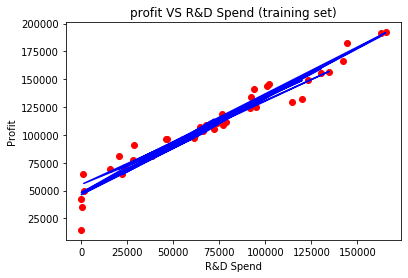

In [81]:
# Visualize our Training Set
plt.scatter(X_train['R&D Spend'], y_train, color="red")
plt.plot(X_train['R&D Spend'], regressor.predict(X_train), color="blue")
plt.title("profit VS R&D Spend (training set)")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

